In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d60d65157098169a6d77977f3c1202aa


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1




# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1       
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | deulgaon raja
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | hervey bay
Processing Record 5 of Set 1 | hualmay
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | sataua
City not found. Skipping...
Processing Record 9 of Set 1 | balimo
City not found. Skipping...
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | kaeo
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | adrar
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | savannah bight
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | puerto ayora
Process

City not found. Skipping...
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | weiser
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | vigia del fuerte
Processing Record 41 of Set 4 | atuona
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | mandurah
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | isangel
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | pousat
City not found. Skipping...
Processing Record 50 of Set 4 | kansk
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | tandil
Processing Record 3 of Set 5 | goderich
Processing Record 4 of Set 5 | rodrigues alves
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | sistranda
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | camana
Proce

Processing Record 26 of Set 8 | ukiah
Processing Record 27 of Set 8 | lappeenranta
Processing Record 28 of Set 8 | alyangula
Processing Record 29 of Set 8 | temaraia
City not found. Skipping...
Processing Record 30 of Set 8 | necochea
Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | victor harbor
Processing Record 33 of Set 8 | beloha
Processing Record 34 of Set 8 | betera
Processing Record 35 of Set 8 | berlevag
Processing Record 36 of Set 8 | aurdal
Processing Record 37 of Set 8 | waingapu
Processing Record 38 of Set 8 | lompoc
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | murray bridge
Processing Record 41 of Set 8 | conakry
Processing Record 42 of Set 8 | bilibino
Processing Record 43 of Set 8 | solnechnyy
Processing Record 44 of Set 8 | aykhal
Processing Record 45 of Set 8 | casas grandes
Processing Record 46 of Set 8 | ovsyanka
Processing Record 47 of Set 8 | storslett
Processing Record 48 of Set 8 | vila franca do campo
Processing

Processing Record 13 of Set 12 | zanjan
Processing Record 14 of Set 12 | ginda
Processing Record 15 of Set 12 | lafia
Processing Record 16 of Set 12 | vysokogornyy
Processing Record 17 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 18 of Set 12 | rancho veloz
Processing Record 19 of Set 12 | gigmoto
Processing Record 20 of Set 12 | tooele
Processing Record 21 of Set 12 | thurso
Processing Record 22 of Set 12 | nantucket
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | xining
Processing Record 25 of Set 12 | obukhiv
Processing Record 26 of Set 12 | richards bay
Processing Record 27 of Set 12 | zasheyek
Processing Record 28 of Set 12 | karaul
City not found. Skipping...
Processing Record 29 of Set 12 | pauini
Processing Record 30 of Set 12 | haibowan
City not found. Skipping...
Processing Record 31 of Set 12 | norman wells
Processing Record 32 of Set 12 | fukue
Processing Record 33 of Set 12 | ust-kut
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.70,-53.46,58.68,70,25,3.89,UY,2020-08-01 14:35:39
1,Deulgaon Raja,20.02,76.03,81.68,78,45,5.66,IN,2020-08-01 14:42:26
2,Narsaq,60.92,-46.05,53.60,66,75,4.70,GL,2020-08-01 14:35:43
3,Hervey Bay,-25.30,152.85,59.00,91,12,4.00,AU,2020-08-01 14:42:26
4,Hualmay,-11.10,-77.61,62.35,77,76,7.38,PE,2020-08-01 14:35:32
5,San Quintin,30.48,-115.95,72.41,70,0,8.21,MX,2020-08-01 14:42:27
6,Lebu,-37.62,-73.65,51.87,96,100,10.67,CL,2020-08-01 14:35:47
7,Bredasdorp,-34.53,20.04,66.20,55,0,6.93,ZA,2020-08-01 14:35:40
8,Kaeo,-35.10,173.78,59.00,3,100,10.00,NZ,2020-08-01 14:35:41
9,Busselton,-33.65,115.33,48.99,76,76,3.78,AU,2020-08-01 14:35:33


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-08-01 14:35:39,-33.70,-53.46,58.68,70,25,3.89
1,Deulgaon Raja,IN,2020-08-01 14:42:26,20.02,76.03,81.68,78,45,5.66
2,Narsaq,GL,2020-08-01 14:35:43,60.92,-46.05,53.60,66,75,4.70
3,Hervey Bay,AU,2020-08-01 14:42:26,-25.30,152.85,59.00,91,12,4.00
4,Hualmay,PE,2020-08-01 14:35:32,-11.10,-77.61,62.35,77,76,7.38


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time

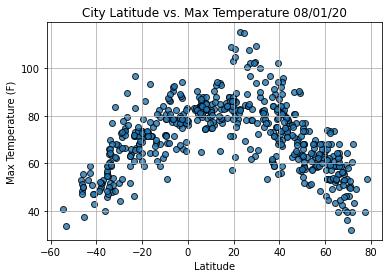

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

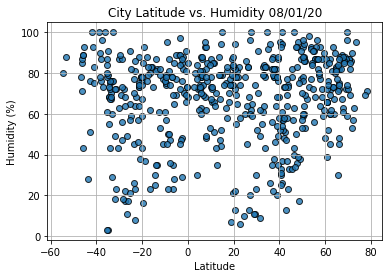

In [24]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

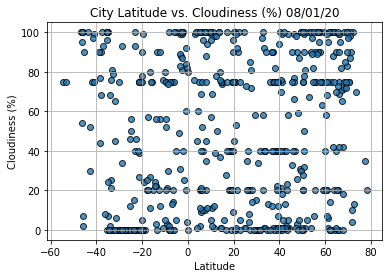

In [26]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

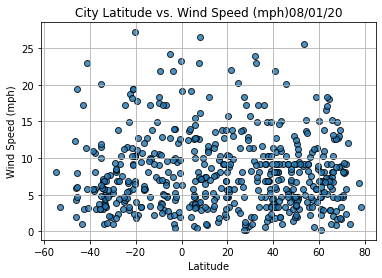

In [27]:
# Build the scatter plot for latitude vs. Windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph)"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()